08-13-20
Cal Craven
Plot important features for Discussion
1. Read in data from csv
2. Plot phases vs statepoints
3. Plot heatmaps with statepoints
4. Plots correlations of single particle descriptors
5. Plot phase prediction histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from plotting import *

# Section 1: Read in data from csv files

In [2]:
df=pandas.read_csv('Full_TNP_Dataset.csv')
df_single_np = pandas.read_csv('Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('rg_asphere.csv')

# Section 2: Plot Phases vs Statepoints

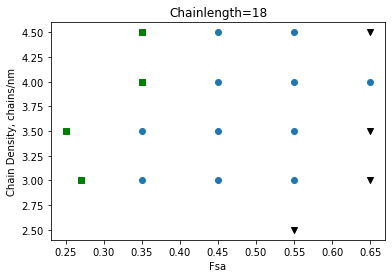

In [3]:
Plot_Fixed_Cl(df,18)

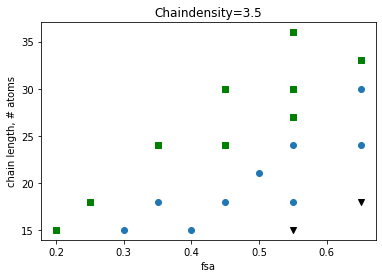

In [4]:
Plot_Fixed_Cd(df,3.5)

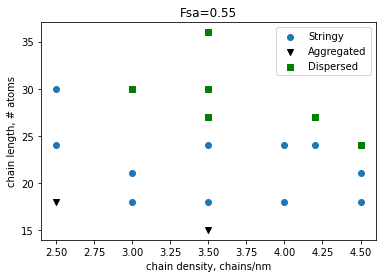

In [5]:
Plot_Fixed_Fsa(df,0.55)

# Section 3: Plot Heat maps for with SASA

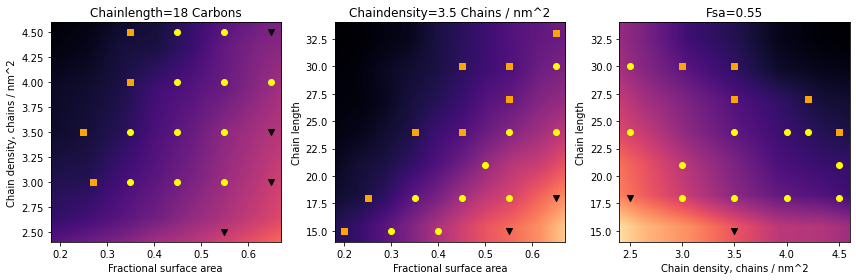

In [6]:
chainlength = df_single_np['chainlength'].unique()
chainlength.sort()
chain_density = df_single_np['chain_density'].unique()
chain_density.sort()
fsa = df_single_np['fsa'].unique()
fsa.sort()
Plot_Heatmaps(chainlength,chain_density,fsa,df_single_np,df)

# Section 4: Plot Correlations between Single Particle Descriptors and Other Variables

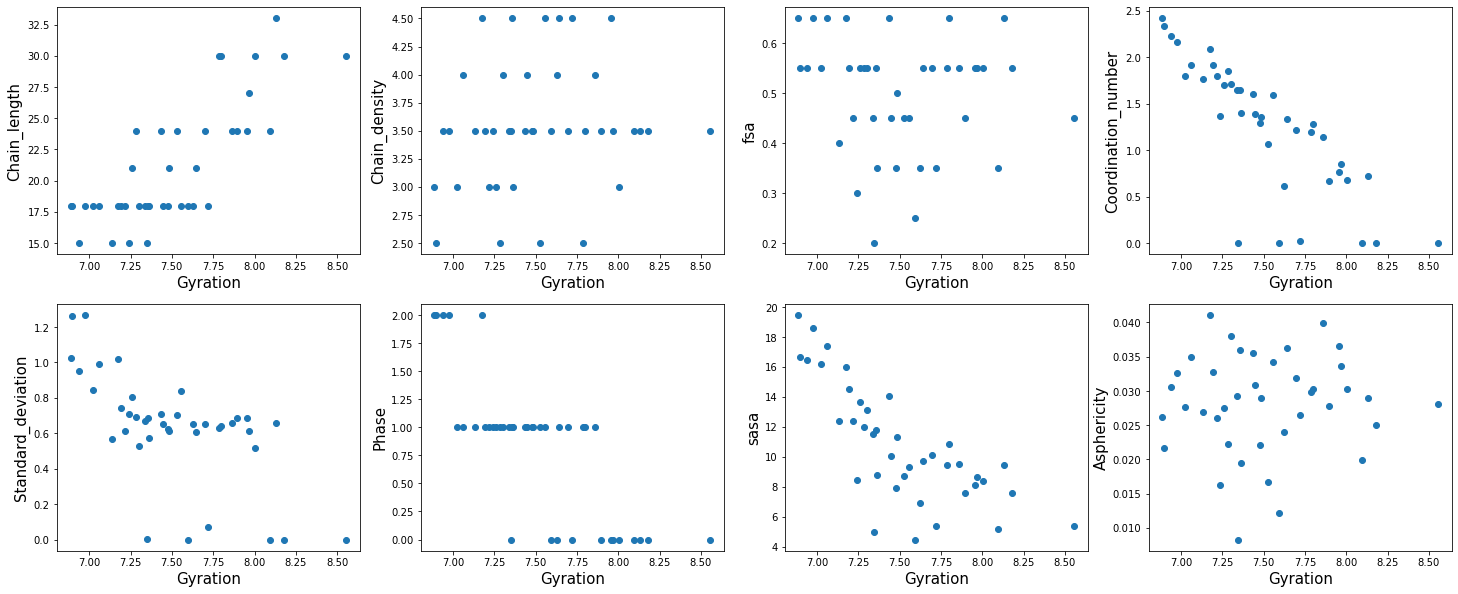

In [7]:
parameter = 'Gyration'
length = len(df.axes[1])
figs,axs = plt.subplots(2,4,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4+2]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=15)
        axs[j][i].set_xlabel(parameter,fontsize=15)

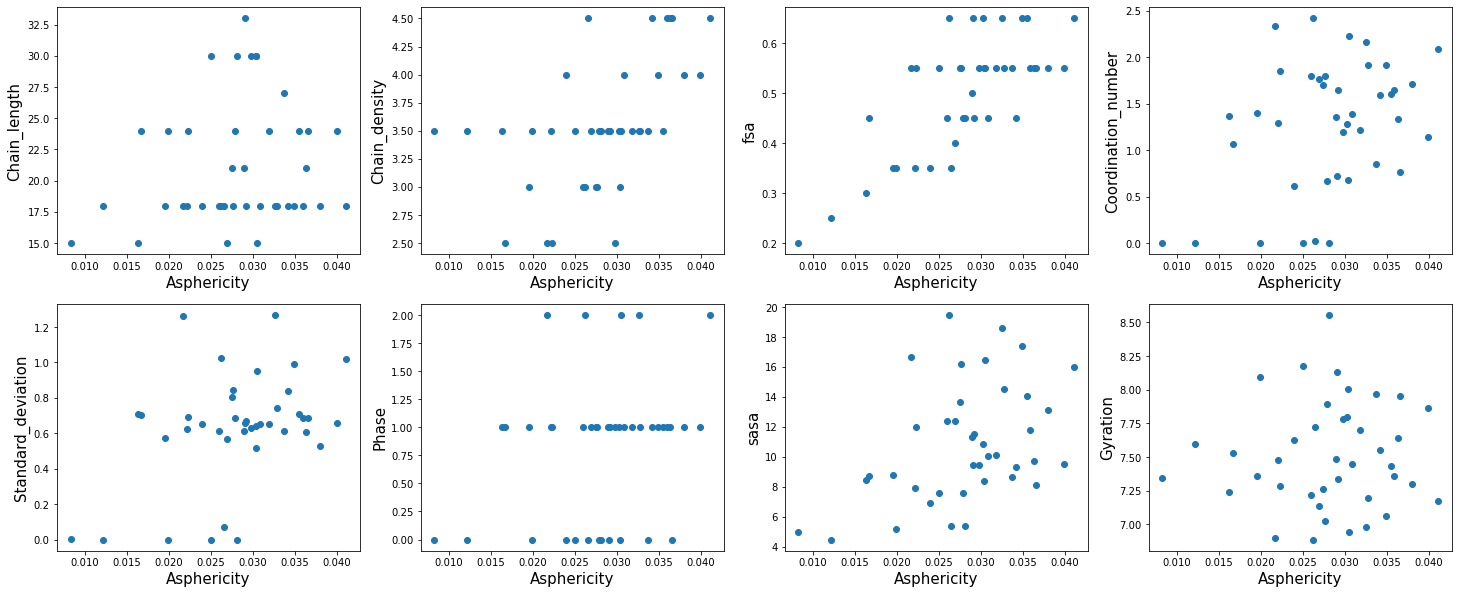

In [8]:
parameter = 'Asphericity'
length = len(df.axes[1])
figs,axs = plt.subplots(2,4,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4+2]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=15)
        axs[j][i].set_xlabel(parameter,fontsize=15)

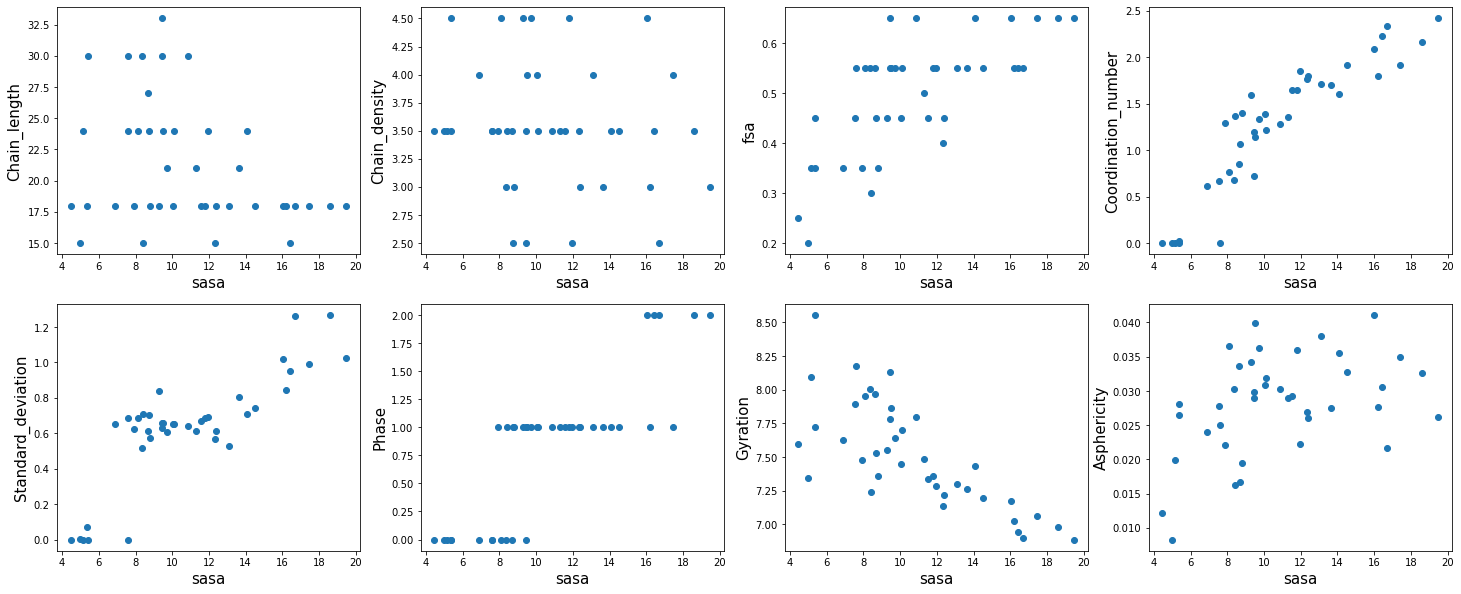

In [9]:
parameter = 'sasa'
length = len(df.axes[1])
figs,axs = plt.subplots(2,4,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4+2]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=15)
        axs[j][i].set_xlabel(parameter,fontsize=15)

# Section 5 : Phase Histograms
Plot different variabes vs the fraction of our simulations that we determined as a particular phase

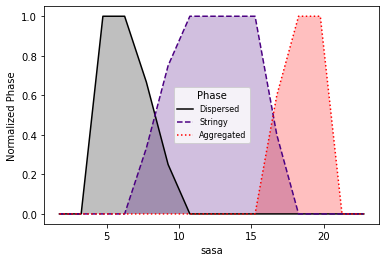

In [10]:
bins = create_bins(lower_bound=1,
                   width=1.5,
                   quantity=15) 
total_counts=Total_Counts(df,bins,'sasa')
bin_center = []
for bin in bins:
    center = (bin[0]+bin[1])/2
    bin_center.append(center)
counts0 = Plot_Phase(df,0,total_counts,bins,'sasa',in_place=False)
counts1 = Plot_Phase(df,1,total_counts,bins,'sasa',in_place=False)
counts2 = Plot_Phase(df,2,total_counts,bins,'sasa',in_place=False)
Plot_All_Phases('sasa',df,bins)

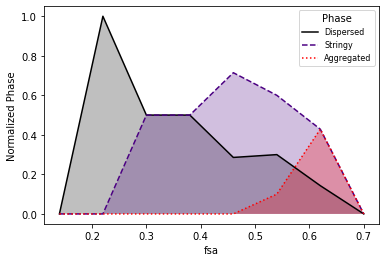

In [11]:
# Get a plot of FSA vs Phase to compare to SASA
bins = create_bins(lower_bound=0.1,
                   width=0.08,
                   quantity=8) 
Plot_All_Phases('fsa',df,bins)

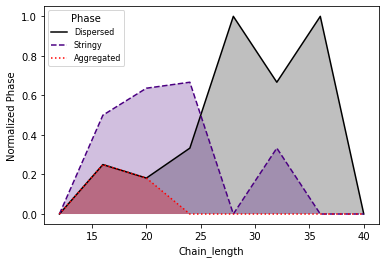

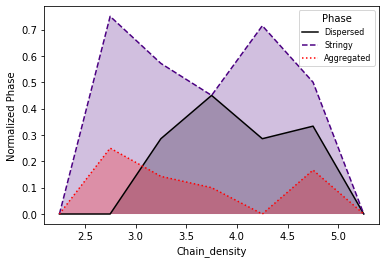

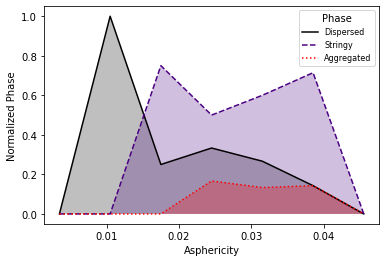

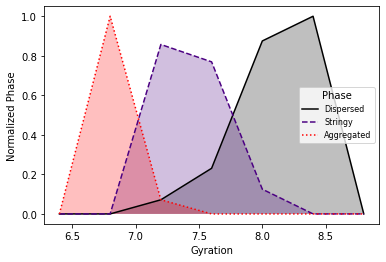

In [12]:
attributes = ['Chain_length', 'Chain_density', 'Asphericity','Gyration']
bins=[]
for size in [[10,4,8],[2,.5,7],[0,0.007,7],[6.2,.4,7]]:
    bins.append(create_bins(lower_bound=size[0],width=size[1],quantity=size[2]))
    
for i,attribute in enumerate(attributes):
    Plot_All_Phases(attribute,df,bins[i])